Dataset link: https://www.kaggle.com/rikdifos/credit-card-approval-prediction
 ## Credit Card Approval Prediction
Problem Statment - A Company wants to automate the Credit Card eligibility process based on customer detail provided while filling online application form & Credit history of customer.

They have given a problem to identify the customers segments which are eligible for Credit Card approval, so that they can specifically target these customers.

## Content 

File - Application Record.csv

Feature name	
ID	
CODE_GENDER
FLAG_OWN_CAR	
FLAG_OWN_REALTY	
CNT_CHILDREN	
AMT_INCOME_TOTAL	
NAME_INCOME_TYPE	
NAME_EDUCATION_TYPE	
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
DAYS_BIRTH
DAYS_EMPLOYED	
FLAG_MOBIL	
FLAG_WORK_PHONE	
FLAG_PHONE	
FLAG_EMAIL	
OCCUPATION_TYPE
CNT_FAM_MEMBERS

Note -
DAYS_BIRTH ---> Count backwards from current day (0), -1 means yesterday
DAYS_EMPLOYED ---> Count backwards from current day(0). If positive, it means the person currently unemployed.

File - Credit Record.csv

Feature name
ID	
MONTHS_BALANCE	
STATUS

Note -
MONTHS_BALANCE ---> The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on.
STATUS ---> 0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading dataset

In [2]:
app_df=pd.read_csv('Application Record.csv')

In [3]:
credit_df=pd.read_csv('Credit Record.csv')

## Exploratory Data Analysis

In [4]:
app_df.shape

(438557, 18)

In [5]:
app_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1


In [6]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [7]:
credit_df.shape

(1048575, 3)

In [8]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


## on file: Application Record.csv 

In [9]:
app_df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [10]:
app_df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [11]:
# dropping occupation type which has many null values
app_df.drop('OCCUPATION_TYPE', axis=1, inplace=True)

In [12]:
app_df['ID'].nunique()

438510

In [13]:
# Checking duplicates in 'ID' column
len(app_df['ID']) - len(app_df['ID'].unique())

47

In [14]:
# Dropping duplicate entries from ID column
app_df = app_df.drop_duplicates('ID') 

In [15]:
len(app_df['ID']) - len(app_df['ID'].unique())

0

In [16]:
# Checking Non-Numerical Columns
cat_columns = app_df.columns[(app_df.dtypes =='object').values].tolist()
cat_columns

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE']

In [17]:
# Checking Numerical Columns
app_df.columns[(app_df.dtypes !='object').values].tolist()

['ID',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS']

In [18]:
# Checking unique values from Categorical Columns

for i in app_df.columns[(app_df.dtypes =='object').values].tolist():
    print(i,'\n')
    print(app_df[i].value_counts())

CODE_GENDER 

F    294406
M    144104
Name: CODE_GENDER, dtype: int64
FLAG_OWN_CAR 

N    275427
Y    163083
Name: FLAG_OWN_CAR, dtype: int64
FLAG_OWN_REALTY 

Y    304040
N    134470
Name: FLAG_OWN_REALTY, dtype: int64
NAME_INCOME_TYPE 

Working                 226076
Commercial associate    100744
Pensioner                75488
State servant            36185
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64
NAME_EDUCATION_TYPE 

Secondary / secondary special    301788
Higher education                 117512
Incomplete higher                 14847
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64
NAME_FAMILY_STATUS 

Married                 299798
Single / not married     55258
Civil marriage           36529
Separated                27251
Widow                    19674
Name: NAME_FAMILY_STATUS, dtype: int64
NAME_HOUSING_TYPE 

House / apartment      393791
With parents            19075
Municipal ap

In [19]:
# Checking unique values from Numerical Columns

In [20]:
app_df['CNT_CHILDREN'].value_counts()

0     304040
1      88518
2      39878
3       5429
4        486
5        133
7          9
9          5
6          4
12         4
14         3
19         1
Name: CNT_CHILDREN, dtype: int64

In [21]:
# Checking Min , Max values from 'DAYS_BIRTH' column
print('Min DAYS_BIRTH :', app_df['DAYS_BIRTH'].min(),'\nMax DAYS_BIRTH :', app_df['DAYS_BIRTH'].max())

Min DAYS_BIRTH : -25201 
Max DAYS_BIRTH : -7489


In [22]:
# Converting 'DAYS_BIRTH' values from Day to Years and renaming days birth column name to age years
app_df['DAYS_BIRTH'] = round(app_df['DAYS_BIRTH']/-365,0)
app_df.rename(columns={'DAYS_BIRTH':'AGE_YEARS'}, inplace=True)

In [23]:
# Checking unique values greater than 0
app_df[app_df['DAYS_EMPLOYED']>0]['DAYS_EMPLOYED'].unique()

array([365243], dtype=int64)

In [24]:
# As mentioned in document, if 'DAYS_EMPLOYED' is positive no, it means person currently unemployed, hence replacing it with 0
app_df['DAYS_EMPLOYED'].replace(365243, 0, inplace=True)

In [25]:
# Converting 'DAYS_EMPLOYED' values from Day to Years
app_df['DAYS_EMPLOYED'] = abs(round(app_df['DAYS_EMPLOYED']/-365,0))
app_df.rename(columns={'DAYS_EMPLOYED':'YEARS_EMPLOYED'}, inplace=True)   

In [26]:
app_df['FLAG_MOBIL'].value_counts()

1    438510
Name: FLAG_MOBIL, dtype: int64

In [27]:
# As all the values in column are 1, hence dropping column
app_df.drop('FLAG_MOBIL', axis=1, inplace=True)

In [28]:
app_df['FLAG_WORK_PHONE'].value_counts()

0    348121
1     90389
Name: FLAG_WORK_PHONE, dtype: int64

In [29]:
# This column only contains 0 & 1 values for Mobile no submitted, hence dropping column
app_df.drop('FLAG_WORK_PHONE', axis=1, inplace=True)

In [30]:
app_df['FLAG_PHONE'].value_counts()

0    312320
1    126190
Name: FLAG_PHONE, dtype: int64

In [31]:
# This column only contains 0 & 1 values for Phone no submitted, hence dropping column
app_df.drop('FLAG_PHONE', axis=1, inplace=True)

In [32]:
app_df['FLAG_EMAIL'].value_counts()

0    391063
1     47447
Name: FLAG_EMAIL, dtype: int64

In [33]:
# This column only contains 0 & 1 values for Email submitted, hence dropping column
app_df.drop('FLAG_EMAIL', axis=1, inplace=True)

In [34]:
app_df['CNT_FAM_MEMBERS'].value_counts()

2     233870
1      84480
3      77121
4      37350
5       5080
6        459
7        124
9          9
11         5
8          4
14         4
15         3
20         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [35]:
app_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1


# Detecting Outliers

C:\Users\SAI SOWMYA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CNT_CHILDREN'>

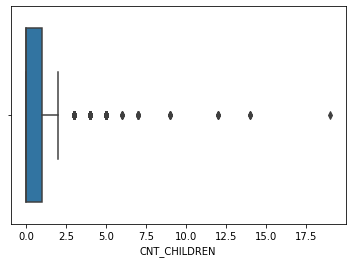

In [36]:
#create plot to detect outliers
sns.boxplot(app_df['CNT_CHILDREN'])

C:\Users\SAI SOWMYA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

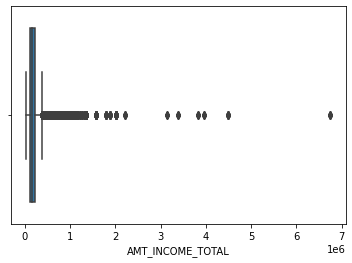

In [37]:
sns.boxplot(app_df['AMT_INCOME_TOTAL'])

C:\Users\SAI SOWMYA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE_YEARS'>

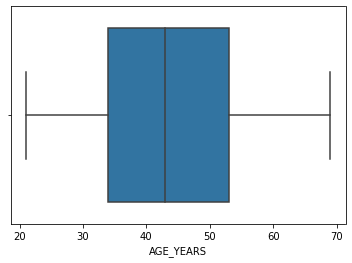

In [38]:
sns.boxplot(app_df['AGE_YEARS'])

C:\Users\SAI SOWMYA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YEARS_EMPLOYED'>

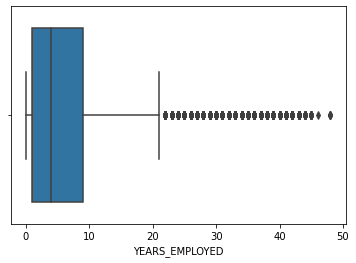

In [39]:
sns.boxplot(app_df['YEARS_EMPLOYED'])

C:\Users\SAI SOWMYA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CNT_FAM_MEMBERS'>

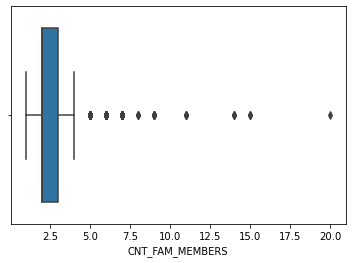

In [40]:
sns.boxplot(app_df['CNT_FAM_MEMBERS'])

## Removing Outliers

In [41]:
high_bound = app_df['CNT_CHILDREN'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = app_df['CNT_CHILDREN'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 4.0
low_bound : 0.0


In [42]:
app_df = app_df[(app_df['CNT_CHILDREN']>=low_bound) & (app_df['CNT_CHILDREN']<=high_bound)]

In [43]:
high_bound = app_df['AMT_INCOME_TOTAL'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = app_df['AMT_INCOME_TOTAL'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 990000.0
low_bound : 36000.0


In [44]:
app_df = app_df[(app_df['AMT_INCOME_TOTAL']>=low_bound) & (app_df['AMT_INCOME_TOTAL']<=high_bound)]

In [45]:
high_bound = app_df['YEARS_EMPLOYED'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = app_df['YEARS_EMPLOYED'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 40.0
low_bound : 0.0


In [46]:
app_df = app_df[(app_df['YEARS_EMPLOYED']>=low_bound) & (app_df['YEARS_EMPLOYED']<=high_bound)]

In [47]:
high_bound = app_df['CNT_FAM_MEMBERS'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = app_df['CNT_FAM_MEMBERS'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 6.0
low_bound : 1.0


In [48]:
app_df = app_df[(app_df['CNT_FAM_MEMBERS']>=low_bound) & (app_df['CNT_FAM_MEMBERS']<=high_bound)]

In [49]:
app_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1


## On file: Credit Record.csv

In [50]:
credit_df.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [51]:
credit_df.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [52]:
credit_df['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [53]:
# categorizing 'STATUS' column to binary classification   0 : Good Client and 1 : bad client
credit_df['STATUS'].replace(['C', 'X'],0, inplace=True)

In [54]:
credit_df['STATUS'].replace(['2','3','4','5'],1, inplace=True)

In [55]:
credit_df['STATUS'] = credit_df['STATUS'].astype('int')

In [56]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype
---  ------          --------------    -----
 0   ID              1048575 non-null  int64
 1   MONTHS_BALANCE  1048575 non-null  int64
 2   STATUS          1048575 non-null  int32
dtypes: int32(1), int64(2)
memory usage: 20.0 MB


In [57]:
credit_df['STATUS'].value_counts(normalize=True)*100

0    98.646353
1     1.353647
Name: STATUS, dtype: float64

In [58]:
credit_df_trans = credit_df.groupby('ID').agg(max).reset_index()

In [59]:
credit_df_trans.drop('MONTHS_BALANCE', axis=1, inplace=True)
credit_df_trans.head()

,ID,STATUS
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0


In [60]:
credit_df_trans['STATUS'].value_counts(normalize=True)*100

0    88.365771
1    11.634229
Name: STATUS, dtype: float64

## Merging dataframes

In [61]:
# merging the two datasets based on 'ID'
final_df = pd.merge(app_df, credit_df_trans, on='ID', how='inner')
final_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1,0


In [62]:
final_df.shape  

(36326, 14)

In [63]:
# dropping 'ID' column as it is having only unique values (not required for ML Model)
final_df.drop('ID', axis=1, inplace=True)

In [64]:
# checking if there are still duplicate rows in Final Dataframe
len(final_df) - len(final_df.drop_duplicates())

25268

In [65]:
# Dropping duplicate records
final_df = final_df.drop_duplicates()
final_df.reset_index(drop=True ,inplace=True)

In [66]:
final_df.shape

(11058, 13)

In [67]:
final_df.isnull().sum()

CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
AGE_YEARS              0
YEARS_EMPLOYED         0
CNT_FAM_MEMBERS        0
STATUS                 0
dtype: int64

In [68]:
final_df['STATUS'].value_counts(normalize=True)*100

0    78.513294
1    21.486706
Name: STATUS, dtype: float64

In [69]:
final_df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2,1
1,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2,0
2,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1,0
3,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,62.0,0.0,1,0
4,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,46.0,2.0,2,0


# Data Visualization

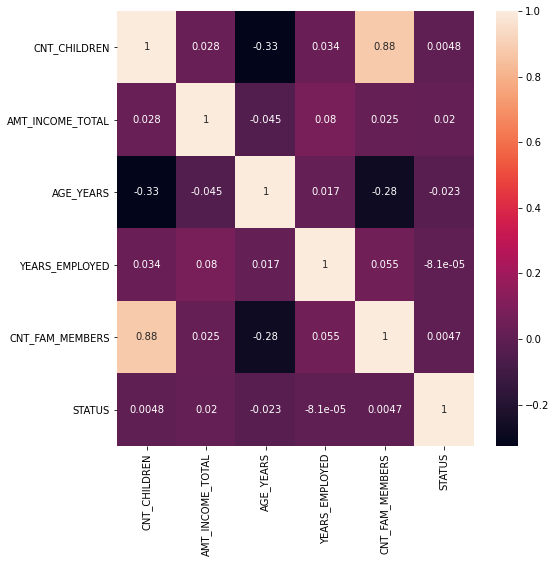

In [70]:
# This graph shows that, there is no column (Feature) which is highly co-related with 'Status'
plt.figure(figsize = (8,8))
sns.heatmap(final_df.corr(), annot=True)
plt.show()

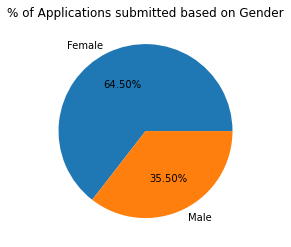

In [71]:
# This graph shows that, majority of application are submitted by Female's
plt.pie(final_df['CODE_GENDER'].value_counts(), labels=['Female', 'Male'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on Gender')
plt.show()

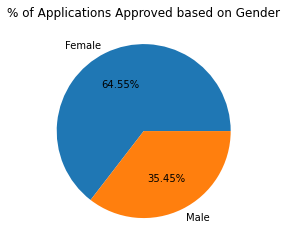

In [72]:
# This graph shows that, majority of application are approved for Female's
plt.pie(final_df[final_df['STATUS']==0]['CODE_GENDER'].value_counts(), labels=['Female', 'Male'], autopct='%1.2f%%')
plt.title('% of Applications Approved based on Gender')
plt.show()

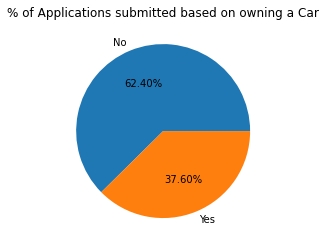

In [73]:
# This graph shows that, majority of applicatant's dont own a car
plt.pie(final_df['FLAG_OWN_CAR'].value_counts(), labels=['No', 'Yes'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on owning a Car')
plt.show()

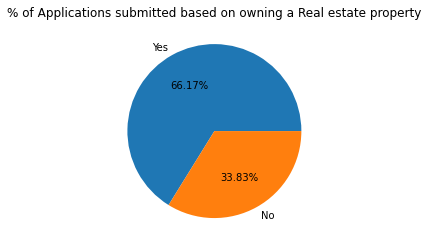

In [74]:
# This graph shows that, majority of applicatant's own a Real Estate property / House
plt.pie(final_df['FLAG_OWN_REALTY'].value_counts(), labels=['Yes','No'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on owning a Real estate property')
plt.show()

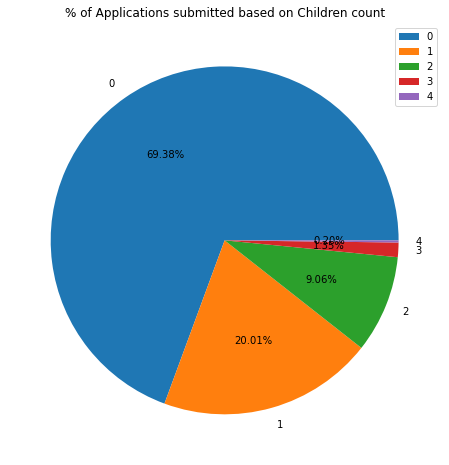

In [75]:
# This graph shows that, majority of applicatant's don't have any children
plt.figure(figsize = (8,8))
plt.pie(final_df['CNT_CHILDREN'].value_counts(), labels=final_df['CNT_CHILDREN'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Children count')
plt.legend()
plt.show()

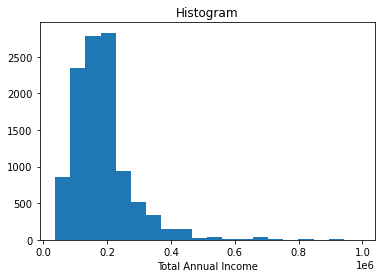

In [76]:
# This graph shows that, majority of applicatant's income lies between 1 to 3 lakh
plt.hist(final_df['AMT_INCOME_TOTAL'], bins=20)
plt.xlabel('Total Annual Income')
plt.title('Histogram')
plt.show()

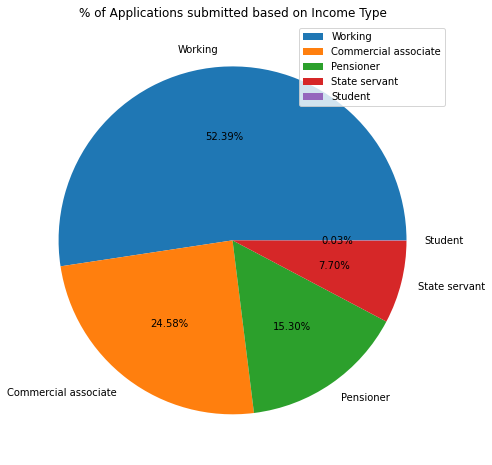

In [77]:
# This graph shows that, majority of applicatant's are working professional
plt.figure(figsize = (8,8))
plt.pie(final_df['NAME_INCOME_TYPE'].value_counts(), labels=final_df['NAME_INCOME_TYPE'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Income Type')
plt.legend()
plt.show()

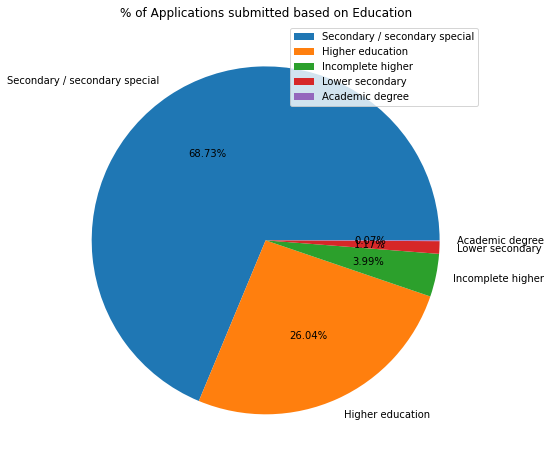

In [78]:
# This graph shows that, majority of applicatant's completed the Secondary Education
plt.figure(figsize=(8,8))
plt.pie(final_df['NAME_EDUCATION_TYPE'].value_counts(), labels=final_df['NAME_EDUCATION_TYPE'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Education')
plt.legend()
plt.show()

C:\Users\SAI SOWMYA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


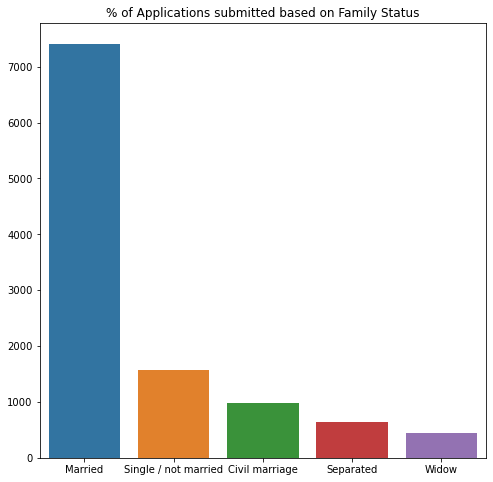

In [79]:
# This graph shows that, majority of applicatant's are married
plt.figure(figsize=(8,8))
sns.barplot(final_df['NAME_FAMILY_STATUS'].value_counts().index, final_df['NAME_FAMILY_STATUS'].value_counts().values)
plt.title('% of Applications submitted based on Family Status')
plt.show()

C:\Users\SAI SOWMYA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


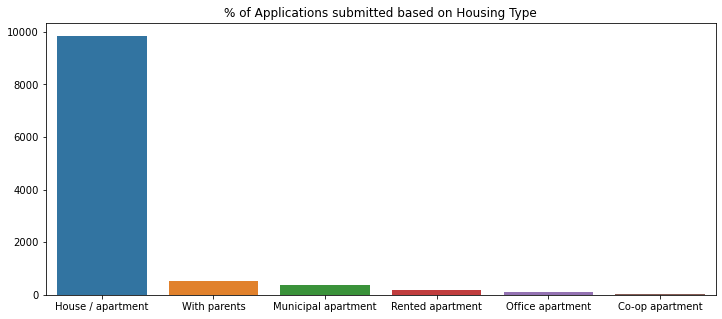

In [80]:
# This graph shows that, majority of applicatant's lives in House / Apartment
plt.figure(figsize=(12,5))
sns.barplot(final_df['NAME_HOUSING_TYPE'].value_counts().index, final_df['NAME_HOUSING_TYPE'].value_counts().values)
plt.title('% of Applications submitted based on Housing Type')
plt.show()

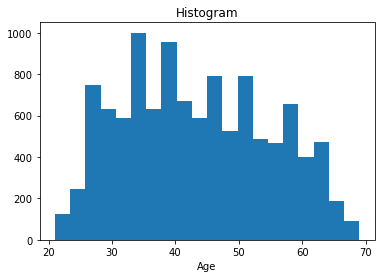

In [81]:
# This graph shows that, majority of applicatant's are 25 to 65 years old
plt.hist(final_df['AGE_YEARS'], bins=20)
plt.xlabel('Age')
plt.title('Histogram')
plt.show()

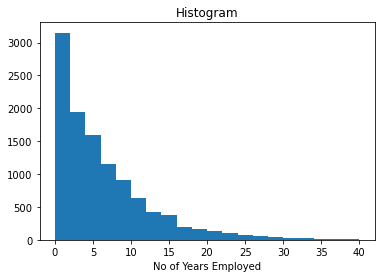

In [82]:
# This graph shows that, majority of applicatant's are Employed for 0 to 7 years
plt.hist(final_df['YEARS_EMPLOYED'], bins=20)
plt.xlabel('No of Years Employed')
plt.title('Histogram')
plt.show()

C:\Users\SAI SOWMYA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


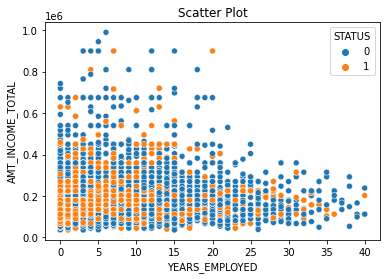

In [83]:
# This graph shows that, majority of applications are rejected if Total income & years of Employment is less
sns.scatterplot(final_df['YEARS_EMPLOYED'], final_df['AMT_INCOME_TOTAL'], hue=final_df['STATUS'])
plt.title('Scatter Plot')
plt.show()

# Feature Selection

In [84]:
final_df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2,1
1,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2,0
2,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1,0
3,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,62.0,0.0,1,0
4,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,46.0,2.0,2,0


In [85]:
cat_columns = final_df.columns[(final_df.dtypes =='object').values].tolist()
cat_columns

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE']

In [86]:
## Encoding categorical data
from sklearn.preprocessing import OneHotEncoder
final_df=pd.get_dummies(final_df)
final_df.head(20)


,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,0,427500.0,33.0,12.0,2,1,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,112500.0,59.0,3.0,2,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
2,0,270000.0,52.0,8.0,1,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3,0,283500.0,62.0,0.0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,0,270000.0,46.0,2.0,2,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
5,0,135000.0,49.0,3.0,2,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
6,0,130500.0,29.0,3.0,2,1,1,0,0,1,...,1,0,0,0,0,1,0,0,0,0
7,0,157500.0,27.0,4.0,2,1,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
8,1,112500.0,30.0,4.0,2,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
9,3,270000.0,35.0,3.0,5,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0


In [87]:
final_df.corr()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
CNT_CHILDREN,1.000000,0.027806,-0.326642,0.033979,0.884676,0.004820,-0.052351,0.052351,-0.087407,0.087407,...,0.173711,-0.023923,-0.147074,-0.098552,0.006783,-0.009349,-0.005042,0.025150,-0.014007,0.013298
AMT_INCOME_TOTAL,0.027806,1.000000,-0.044799,0.079548,0.025272,0.020289,-0.199358,0.199358,-0.218026,0.218026,...,0.011637,0.011327,0.007555,-0.042739,0.008659,0.010298,-0.013894,0.025155,0.012359,-0.023376
AGE_YEARS,-0.326642,-0.044799,1.000000,0.016587,-0.275968,-0.022945,0.157507,-0.157507,0.106634,-0.106634,...,0.006189,0.061043,-0.132663,0.230248,-0.022296,0.174010,0.015549,-0.018650,-0.069608,-0.213853
YEARS_EMPLOYED,0.033979,0.079548,0.016587,1.000000,0.055498,-0.000081,0.043657,-0.043657,-0.006570,0.006570,...,0.069703,0.006172,-0.051061,-0.045067,-0.006328,0.028180,0.008875,0.027071,-0.029927,-0.041597
CNT_FAM_MEMBERS,0.884676,0.025272,-0.275968,0.055498,1.000000,0.004675,-0.078853,0.078853,-0.138978,0.138978,...,0.514553,-0.227364,-0.451509,-0.251752,-0.002321,0.026572,-0.020030,0.017581,-0.029076,-0.012034
STATUS,0.004820,0.020289,-0.022945,-0.000081,0.004675,1.000000,-0.002039,0.002039,0.003826,-0.003826,...,-0.005632,-0.014645,0.015767,-0.004581,-0.005125,-0.015677,0.006337,0.004323,0.012849,0.009741
CODE_GENDER_F,-0.052351,-0.199358,0.157507,0.043657,-0.078853,-0.002039,1.000000,-1.000000,0.348307,-0.348307,...,-0.096394,0.055638,-0.015433,0.136941,-0.019616,0.044406,0.022360,-0.042459,-0.039837,-0.037732
CODE_GENDER_M,0.052351,0.199358,-0.157507,-0.043657,0.078853,0.002039,-1.000000,1.000000,-0.348307,0.348307,...,0.096394,-0.055638,0.015433,-0.136941,0.019616,-0.044406,-0.022360,0.042459,0.039837,0.037732
FLAG_OWN_CAR_N,-0.087407,-0.218026,0.106634,-0.006570,-0.138978,0.003826,0.348307,-0.348307,1.000000,-1.000000,...,-0.152205,0.060168,0.083632,0.098024,-0.013653,-0.020865,0.037445,-0.013532,0.011932,0.001235
FLAG_OWN_CAR_Y,0.087407,0.218026,-0.106634,0.006570,0.138978,-0.003826,-0.348307,0.348307,-1.000000,1.000000,...,0.152205,-0.060168,-0.083632,-0.098024,0.013653,0.020865,-0.037445,0.013532,-0.011932,-0.001235


In [88]:
X = final_df.drop(['STATUS'], axis=1)
y = final_df['STATUS']

In [89]:
X.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,0,427500.0,33.0,12.0,2,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,112500.0,59.0,3.0,2,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
2,0,270000.0,52.0,8.0,1,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0,283500.0,62.0,0.0,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,270000.0,46.0,2.0,2,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0


In [90]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: STATUS, dtype: int32

## Splitting data

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 10)

## Feature Scaling and Balancing data

In [92]:
# scaling all features using Normalization
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
X_train_scaled = pd.DataFrame(MMS.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(MMS.transform(X_test), columns=X_test.columns)

In [93]:
! pip install -U imbalanced-learn

In [94]:
# adding samples to minority class using SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X_train_oversam, y_train_oversam = oversample.fit_resample(X_train_scaled, y_train)
X_test_oversam, y_test_oversam = oversample.fit_resample(X_test_scaled, y_test)

In [95]:
# Original majority and minority class
y_train.value_counts(normalize=True)*100

0    78.430929
1    21.569071
Name: STATUS, dtype: float64

In [96]:
# after using SMOTE 
y_train_oversam.value_counts(normalize=True)*100

0    50.0
1    50.0
Name: STATUS, dtype: float64

## Model Evaluation

## Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [98]:
log_model = LogisticRegression()
log_model.fit(X_train_oversam, y_train_oversam)

C:\Users\SAI SOWMYA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [99]:
y_pred=log_model.predict(X_test_oversam)

In [100]:
accuracy_score(y_test_oversam,y_pred)

0.5166284403669725

In [101]:
print(confusion_matrix(y_test_oversam,y_pred))

[[930 814]
 [872 872]]


In [102]:
print(classification_report(y_test_oversam,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.53      0.52      1744
           1       0.52      0.50      0.51      1744

    accuracy                           0.52      3488
   macro avg       0.52      0.52      0.52      3488
weighted avg       0.52      0.52      0.52      3488



# Decision Tree classification

In [103]:
from sklearn.tree import DecisionTreeClassifier

decision_model = DecisionTreeClassifier(max_depth=12,min_samples_split=8)

decision_model.fit(X_train_oversam, y_train_oversam)

DecisionTreeClassifier(max_depth=12, min_samples_split=8)

In [104]:
y_pred = decision_model.predict(X_test_oversam)

In [105]:
accuracy_score(y_test_oversam,y_pred)

0.7485665137614679

In [106]:
print(confusion_matrix(y_test_oversam,y_pred))

[[1593  151]
 [ 726 1018]]


In [107]:
print(classification_report(y_test_oversam,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.91      0.78      1744
           1       0.87      0.58      0.70      1744

    accuracy                           0.75      3488
   macro avg       0.78      0.75      0.74      3488
weighted avg       0.78      0.75      0.74      3488



# Support Vector Machine classification

In [108]:
from sklearn.svm import SVC

svc_model = SVC()

svc_model.fit(X_train_oversam, y_train_oversam)

SVC()

In [109]:
y_pred = svc_model.predict(X_test_oversam)

In [110]:
accuracy_score(y_test_oversam,y_pred)

0.5513188073394495

In [111]:
print(confusion_matrix(y_test_oversam,y_pred))

[[ 889  855]
 [ 710 1034]]


In [112]:
print(classification_report(y_test_oversam,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.51      0.53      1744
           1       0.55      0.59      0.57      1744

    accuracy                           0.55      3488
   macro avg       0.55      0.55      0.55      3488
weighted avg       0.55      0.55      0.55      3488



# K Nearest Neighbor classification

In [143]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors =7)

knn_model.fit(X_train_oversam, y_train_oversam)

KNeighborsClassifier(n_neighbors=7)

In [144]:
y_pred = knn_model.predict(X_test_oversam)

In [145]:
accuracy_score(y_test_oversam,y_pred)

0.45756880733944955

In [146]:
print(confusion_matrix(y_test_oversam,y_pred))

[[ 906  838]
 [1054  690]]


In [147]:
print(classification_report(y_test_oversam,y_pred))

              precision    recall  f1-score   support

           0       0.46      0.52      0.49      1744
           1       0.45      0.40      0.42      1744

    accuracy                           0.46      3488
   macro avg       0.46      0.46      0.46      3488
weighted avg       0.46      0.46      0.46      3488



## Random Forest Model

In [118]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators=250,
                                            max_depth=12,
                                            min_samples_leaf=16) 
classifier.fit(X_train_oversam, y_train_oversam)  

RandomForestClassifier(max_depth=12, min_samples_leaf=16, n_estimators=250)

In [119]:
y_pred =classifier.predict(X_test_oversam)

In [120]:
accuracy_score(y_test_oversam,y_pred)

0.7210435779816514

In [121]:
print(confusion_matrix(y_test_oversam,y_pred))

[[1308  436]
 [ 537 1207]]


In [122]:
print(classification_report(y_test_oversam,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      1744
           1       0.73      0.69      0.71      1744

    accuracy                           0.72      3488
   macro avg       0.72      0.72      0.72      3488
weighted avg       0.72      0.72      0.72      3488



## XGBOOST Model

In [123]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier()
XGB_model.fit(X_train_oversam, y_train_oversam)

C:\Users\SAI SOWMYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:48:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [124]:
y_pred =XGB_model.predict(X_test_oversam)

In [125]:
accuracy_score(y_test_oversam,y_pred)

0.836295871559633

In [126]:
print(confusion_matrix(y_test_oversam,y_pred))

[[1631  113]
 [ 458 1286]]


In [127]:
print(classification_report(y_test_oversam,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85      1744
           1       0.92      0.74      0.82      1744

    accuracy                           0.84      3488
   macro avg       0.85      0.84      0.83      3488
weighted avg       0.85      0.84      0.83      3488



## Conclusion:
## Accuracy Scores:
    Logistic Regression: 51%
    Decision Tree Classification: 67%
    Support Vector Machine: 55%
    K Nearest Neighbour: 46%
    Random Forest Model: 71%
    XGBOOST Model: 84%
   
 As we have seen that, XGBoost Model is giving highest accuracy of 84%, hence we will use XGBoost Model for predicion